## Programming Exercise 6:

### Support Vector Machines

### Introduction

In this exercise, you will be using support vector machines (SVMs) to build a spam classifier.

In [1]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Import regular expressions to process emails
import re

# Plotting library
from matplotlib import pyplot

# Optimization module in scipy
from scipy import optimize

# will be used to load MATLAB mat datafile format
from scipy.io import loadmat

# library written for this exercise providing additional functions for assignment submission, and others
import utils

# define the submission/grader object for this exercise
grader = utils.Grader()

# tells matplotlib to embed plots within the notebook
%matplotlib inline

### 1 Support Vector Machines

In the first half of this exercise, you will be using support vector machines (SVMs) with various example 2D datasets. Experimenting with these datasets will help you gain an intuition of how SVMs work and how to use a Gaussian kernel with SVMs. In the next half of the exercise, you will be using support vector machines to build a spam classifier.

### 1.1 Example Dataset 1

n this dataset, the positions of the positive examples (indicated with x) and the negative examples (indicated with o) suggest a natural separation indicated by the gap. However, notice that there is an outlier positive example x on the far left at about (0.1, 4.1). As part of this exercise, you will also see how this outlier affects the SVM decision boundary.

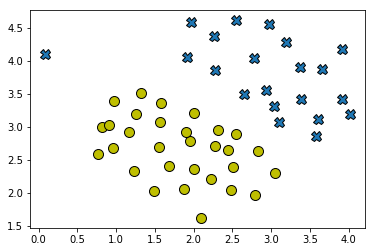

In [2]:
# Load from ex6data1
# You will have X, y as keys in the dict data
data = loadmat(os.path.join('Data', 'ex6data1.mat'))
X, y = data['X'], data['y'][:, 0]

# Plot training data
utils.plotData(X, y)

In this part of the exercise, you will try using different values of the $C$ parameter with SVMs. Informally, the $C$ parameter is a positive value that controls the penalty for misclassified training examples. A large $C$ parameter tells the SVM to try to classify all the examples correctly. $C$ plays a role similar to $1/\lambda$, where $\lambda$ is the regularization parameter that we were using previously for logistic regression.

The following cell will run the SVM training (with $C=1$) using SVM software that we have included with the starter code (function `svmTrain` within the `utils` module of this exercise). When $C=1$, you should find that the SVM puts the decision boundary in the gap between the two datasets and *misclassifies* the data point on the far left, as shown in the figure (left) below.

In order to minimize the dependency of this assignment on external libraries, we have included this implementation of an SVM learning algorithm in utils.svmTrain. However, this particular implementation is not very efficient (it was originally chosen to maximize compatibility between Octave/MATLAB for the first version of this assignment set). If you are training an SVM on a real problem, especially if you need to scale to a larger dataset, we strongly recommend instead using a highly optimized SVM toolbox such as [LIBSVM](https://www.csie.ntu.edu.tw/~cjlin/libsvm/). The python machine learning library [scikit-learn](http://scikit-learn.org/stable/index.html) provides wrappers for the LIBSVM library.

**Implementation Note:** Most SVM software packages (including the function `utils.svmTrain`) automatically add the extra feature $x_0$ = 1 for you and automatically take care of learning the intercept term $\theta_0$. So when passing your training data to the SVM software, there is no need to add this extra feature $x_0 = 1$ yourself. In particular, in python your code should be working with training examples $x \in \mathcal{R}^n$ (rather than $x \in \mathcal{R}^{n+1}$); for example, in the first example dataset $x \in \mathcal{R}^2$.

Your task is to try different values of $C$ on this dataset. Specifically, you should change the value of $C$ in the next cell to $C = 100$ and run the SVM training again. When $C = 100$, you should find that the SVM now classifies every single example correctly, but has a decision boundary that does not appear to be a natural fit for the data.


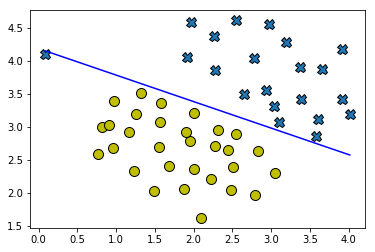

In [3]:
# You should try to change the C value below and see how the decision
# boundary varies (e.g., try C = 1000)
C = 100

model = utils.svmTrain(X, y, C, utils.linearKernel, 1e-3, 20)
utils.visualizeBoundaryLinear(X, y, model)

### 1.2 SVM with Gaussian Kernels

In this part of the exercise, you will be using SVMs to do non-linear classification. In particular, you will be using SVMs with Gaussian kernels on datasets that are not linearly separable.

### 1.2.1 Gaussian Kerne

To find non-linear decision boundaries with the SVM, we need to first implement a Gaussian kernel. You can think of the Gaussian kernel as a similarity function that measures the “distance” between a pair of examples,
($x^{(i)}$, $x^{(j)}$). The Gaussian kernel is also parameterized by a bandwidth parameter, $\sigma$, which determines how fast the similarity metric decreases (to 0) as the examples are further apart.
You should now complete the code in `gaussianKernel` to compute the Gaussian kernel between two examples, ($x^{(i)}$, $x^{(j)}$). The Gaussian kernel function is defined as:

$$ K_{\text{gaussian}} \left( x^{(i)}, x^{(j)} \right) = \exp \left( - \frac{\left\lvert\left\lvert x^{(i)} - x^{(j)}\right\lvert\right\lvert^2}{2\sigma^2} \right) = \exp \left( -\frac{\sum_{k=1}^n \left( x_k^{(i)} - x_k^{(j)}\right)^2}{2\sigma^2} \right)$$
    

In [4]:
def gaussianKernel(x1, x2, sigma):
    """
    Computes the radial basis function
    Returns a radial basis function kernel between x1 and x2.
    
    Parameters
    ----------
    x1 :  numpy ndarray
        A vector of size (n, ), representing the first datapoint.
    
    x2 : numpy ndarray
        A vector of size (n, ), representing the second datapoint.
    
    sigma : float
        The bandwidth parameter for the Gaussian kernel.

    Returns
    -------
    sim : float
        The computed RBF between the two provided data points.
    
    Instructions
    ------------
    Fill in this function to return the similarity between `x1` and `x2`
    computed using a Gaussian kernel with bandwidth `sigma`.
    """
    sim = 0
    # ====================== YOUR CODE HERE ======================
    ar =  (-1)*(np.sum((x1-x2)**2) / (2*sigma * sigma))
    sim = np.exp(ar)

    # =============================================================
    return sim

In [6]:
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2

sim = gaussianKernel(x1, x2, sigma)
#print(sim)
print('Gaussian Kernel between x1 = [1, 2, 1], x2 = [0, 4, -1], sigma = %0.2f:'
    '\n\t%f\n(for sigma = 2, this value should be about 0.324652)\n' % (sigma, sim))

Gaussian Kernel between x1 = [1, 2, 1], x2 = [0, 4, -1], sigma = 2.00:
	0.324652
(for sigma = 2, this value should be about 0.324652)



In [14]:
grader[1] = gaussianKernel
grader.grade()


Submitting Solutions | Programming Exercise support-vector-machines

Use token from last successful submission (aditi.barua08@gmail.com)? (Y/n): n
Login (email address): aditi.barua08@gmail.com
Token: XJvCTPSlLGSsaHo4
                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
                   Email Feature Extraction |  25 /  25 | Nice work!
                            Gaussian Kernel |  25 /  25 | Nice work!
        Parameters (C, sigma) for Dataset 3 |   0 /  25 | Your answer is incorrect.
                           Email Processing |   0 /  25 | Your answer is incorrect.
                                  --------------------------------
                                            |  50 / 100 |  



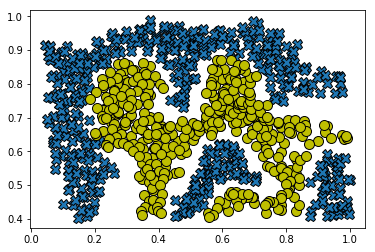

In [7]:
# Load from ex6data2
# You will have X, y as keys in the dict data
data = loadmat(os.path.join('Data', 'ex6data2.mat'))
X, y = data['X'], data['y'][:, 0]

# Plot training data
utils.plotData(X, y)

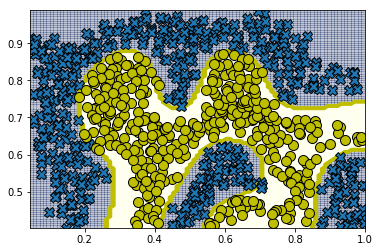

In [8]:
# SVM Parameters
C = 1
sigma = 0.1

model= utils.svmTrain(X, y, C, gaussianKernel, args=(sigma,))
utils.visualizeBoundary(X, y, model)

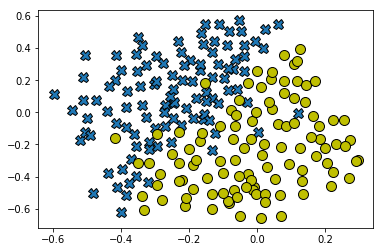

In [10]:
# Load from ex6data3
# You will have X, y, Xval, yval as keys in the dict data
data = loadmat(os.path.join('Data', 'ex6data3.mat'))
X, y, Xval, yval = data['X'], data['y'][:, 0], data['Xval'], data['yval'][:, 0]

# Plot training data
utils.plotData(X, y)

In [11]:
def dataset3Params(X, y, Xval, yval):
    """
    Returns your choice of C and sigma for Part 3 of the exercise 
    where you select the optimal (C, sigma) learning parameters to use for SVM
    with RBF kernel.
    
    Parameters
    ----------
    X : array_like
        (m x n) matrix of training data where m is number of training examples, and 
        n is the number of features.
    
    y : array_like
        (m, ) vector of labels for ther training data.
    
    Xval : array_like
        (mv x n) matrix of validation data where mv is the number of validation examples
        and n is the number of features
    
    yval : array_like
        (mv, ) vector of labels for the validation data.
    
    Returns
    -------
    C, sigma : float, float
        The best performing values for the regularization parameter C and 
        RBF parameter sigma.
    
    Instructions
    ------------
    Fill in this function to return the optimal C and sigma learning 
    parameters found using the cross validation set.
    You can use `svmPredict` to predict the labels on the cross
    validation set. For example, 
    
        predictions = utils.svmPredict(model, Xval)

    will return the predictions on the cross validation set.
    
    Note
    ----
    You can compute the prediction error using 
    
        np.mean(predictions != yval)
    """
    # You need to return the following variables correctly.
    C = 1
    sigma = 0.3
    
    
    # ====================== YOUR CODE HERE ======================
    candidate = np.array([0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30])
    lst_error = np.zeros([candidate.size, candidate.size])
    error=0.0
    min_error =0.0
    count=0
    for i in np.arange(candidate.size):
        for j in np.arange(candidate.size):
            model= utils.svmTrain(X, y, candidate[i], gaussianKernel, args=(candidate[j],))
            predictions = utils.svmPredict(model, Xval)
            error = np.mean(predictions != yval)
            if i ==0 and j==0 :
                min_error = error 
                continue 
            if error < min_error:
                #print('error: ', error , 'pre_error: ', min_error )
                c=  candidate[i]
                sigma=  candidate[j]
                min_error= error
    # ============================================================
    return C, sigma

1 0.1


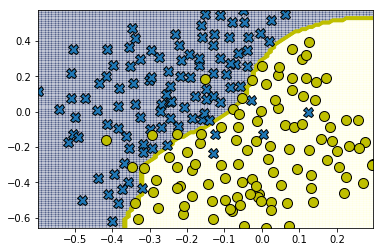

In [12]:
# Try different SVM Parameters here
C, sigma = dataset3Params(X, y, Xval, yval)

# Train the SVM
# model = utils.svmTrain(X, y, C, lambda x1, x2: gaussianKernel(x1, x2, sigma))
model = utils.svmTrain(X, y, C, gaussianKernel, args=(sigma,))
utils.visualizeBoundary(X, y, model)
print(C, sigma)

In [15]:
grader[2] = lambda : (C, sigma)
grader.grade()


Submitting Solutions | Programming Exercise support-vector-machines

Use token from last successful submission (aditi.barua08@gmail.com)? (Y/n): Y
                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
                   Email Feature Extraction |  25 /  25 | Nice work!
                            Gaussian Kernel |  25 /  25 | Nice work!
        Parameters (C, sigma) for Dataset 3 |   0 /  25 | Your answer is incorrect.
                           Email Processing |   0 /  25 | Your answer is incorrect.
                                  --------------------------------
                                            |  50 / 100 |  



In [22]:
def processEmail(email_contents, verbose=True):
    """
    Preprocesses the body of an email and returns a list of indices 
    of the words contained in the email.    
    
    Parameters
    ----------
    email_contents : str
        A string containing one email. 
    
    verbose : bool
        If True, print the resulting email after processing.
    
    Returns
    -------
    word_indices : list
        A list of integers containing the index of each word in the 
        email which is also present in the vocabulary.
    
    Instructions
    ------------
    Fill in this function to add the index of word to word_indices 
    if it is in the vocabulary. At this point of the code, you have 
    a stemmed word from the email in the variable word.
    You should look up word in the vocabulary list (vocabList). 
    If a match exists, you should add the index of the word to the word_indices
    list. Concretely, if word = 'action', then you should
    look up the vocabulary list to find where in vocabList
    'action' appears. For example, if vocabList[18] =
    'action', then, you should add 18 to the word_indices 
    vector (e.g., word_indices.append(18)).
    
    Notes
    -----
    - vocabList[idx] returns a the word with index idx in the vocabulary list.
    
    - vocabList.index(word) return index of word `word` in the vocabulary list.
      (A ValueError exception is raised if the word does not exist.)
    """
    # Load Vocabulary
    vocabList = utils.getVocabList()

    # Init return value
    word_indices = []

    # ========================== Preprocess Email ===========================
    # Find the Headers ( \n\n and remove )
    # Uncomment the following lines if you are working with raw emails with the
    # full headers
    # hdrstart = email_contents.find(chr(10) + chr(10))
    # email_contents = email_contents[hdrstart:]

    # Lower case
    email_contents = email_contents.lower()
    
    # Strip all HTML
    # Looks for any expression that starts with < and ends with > and replace
    # and does not have any < or > in the tag it with a space
    email_contents =re.compile('<[^<>]+>').sub(' ', email_contents)

    # Handle Numbers
    # Look for one or more characters between 0-9
    email_contents = re.compile('[0-9]+').sub(' number ', email_contents)

    # Handle URLS
    # Look for strings starting with http:// or https://
    email_contents = re.compile('(http|https)://[^\s]*').sub(' httpaddr ', email_contents)

    # Handle Email Addresses
    # Look for strings with @ in the middle
    email_contents = re.compile('[^\s]+@[^\s]+').sub(' emailaddr ', email_contents)
    
    # Handle $ sign
    email_contents = re.compile('[$]+').sub(' dollar ', email_contents)
    
    # get rid of any punctuation
    email_contents = re.split('[ @$/#.-:&*+=\[\]?!(){},''">_<;%\n\r]', email_contents)

    # remove any empty word string
    email_contents = [word for word in email_contents if len(word) > 0]
    
    # Stem the email contents word by word
    stemmer = utils.PorterStemmer()
    processed_email = []
    for word in email_contents:
        # Remove any remaining non alphanumeric characters in word
        word = re.compile('[^a-zA-Z0-9]').sub('', word).strip()
        word = stemmer.stem(word)
        processed_email.append(word)

        if len(word) < 1:
            continue

        # Look up the word in the dictionary and add to word_indices if found
        # ====================== YOUR CODE HERE ======================
        if word in vocabList:
            ind= vocabList.index(word)
            word_indices.append(ind)
            
        

        # =============================================================

    if verbose:
        print('----------------')
        print('Processed email:')
        print('----------------')
        print(' '.join(processed_email))
    return word_indices

In [23]:
#  To use an SVM to classify emails into Spam v.s. Non-Spam, you first need
#  to convert each email into a vector of features. In this part, you will
#  implement the preprocessing steps for each email. You should
#  complete the code in processEmail.m to produce a word indices vector
#  for a given email.

# Extract Features
with open(os.path.join('Data', 'emailSample1.txt')) as fid:
    file_contents = fid.read()

word_indices  = processEmail(file_contents)

#Print Stats
print('-------------')
print('Word Indices:')
print('-------------')
print(word_indices)

----------------
Processed email:
----------------
anyon know how much it cost to host a web portal well it depend on how mani visitor your expect thi can be anywher from less than number buck a month to a coupl of dollar number you should checkout httpaddr or perhap amazon ec number if your run someth big to unsubscrib yourself from thi mail list send an email to emailaddr
-------------
Word Indices:
-------------
[85, 915, 793, 1076, 882, 369, 1698, 789, 1821, 1830, 882, 430, 1170, 793, 1001, 1894, 591, 1675, 237, 161, 88, 687, 944, 1662, 1119, 1061, 1698, 374, 1161, 476, 1119, 1892, 1509, 798, 1181, 1236, 511, 1119, 809, 1894, 1439, 1546, 180, 1698, 1757, 1895, 687, 1675, 991, 960, 1476, 70, 529, 1698, 530]


In [24]:
grader[3] = processEmail
grader.grade()


Submitting Solutions | Programming Exercise support-vector-machines

Use token from last successful submission (aditi.barua08@gmail.com)? (Y/n): n
Login (email address): aditi.barua08@gmail.com
Token: qQNdKQnun8W6ZInB
                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
                   Email Feature Extraction |  25 /  25 | Nice work!
                            Gaussian Kernel |  25 /  25 | Nice work!
        Parameters (C, sigma) for Dataset 3 |  25 /  25 | Nice work!
                           Email Processing |   0 /  25 | Your answer is incorrect.
                                  --------------------------------
                                            |  75 / 100 |  



In [27]:
def emailFeatures(word_indices):
    """
    Takes in a word_indices vector and produces a feature vector from the word indices. 
    
    Parameters
    ----------
    word_indices : list
        A list of word indices from the vocabulary list.
    
    Returns
    -------
    x : list 
        The computed feature vector.
    
    Instructions
    ------------
    Fill in this function to return a feature vector for the
    given email (word_indices). To help make it easier to  process 
    the emails, we have have already pre-processed each email and converted
    each word in the email into an index in a fixed dictionary (of 1899 words).
    The variable `word_indices` contains the list of indices of the words 
    which occur in one email.
    
    Concretely, if an email has the text:

        The quick brown fox jumped over the lazy dog.

    Then, the word_indices vector for this text might look  like:
               
        60  100   33   44   10     53  60  58   5

    where, we have mapped each word onto a number, for example:

        the   -- 60
        quick -- 100
        ...

    Note
    ----
    The above numbers are just an example and are not the actual mappings.

    Your task is take one such `word_indices` vector and construct
    a binary feature vector that indicates whether a particular
    word occurs in the email. That is, x[i] = 1 when word i
    is present in the email. Concretely, if the word 'the' (say,
    index 60) appears in the email, then x[60] = 1. The feature
    vector should look like:
        x = [ 0 0 0 0 1 0 0 0 ... 0 0 0 0 1 ... 0 0 0 1 0 ..]
    """
    # Total number of words in the dictionary
    n = 1899

    # You need to return the following variables correctly.
    x = np.zeros(n)

    # ===================== YOUR CODE HERE ======================
    #print(word_indices)
    x[word_indices] = 1
    
    # ===========================================================
    
    return x

In [28]:
# Extract Features
with open(os.path.join('Data', 'emailSample1.txt')) as fid:
    file_contents = fid.read()

word_indices  = processEmail(file_contents)
features      = emailFeatures(word_indices)

# Print Stats
print('\nLength of feature vector: %d' % len(features))
print('Number of non-zero entries: %d' % sum(features > 0))

----------------
Processed email:
----------------
anyon know how much it cost to host a web portal well it depend on how mani visitor your expect thi can be anywher from less than number buck a month to a coupl of dollar number you should checkout httpaddr or perhap amazon ec number if your run someth big to unsubscrib yourself from thi mail list send an email to emailaddr

Length of feature vector: 1899
Number of non-zero entries: 45


In [29]:
grader[4] = emailFeatures
grader.grade()


Submitting Solutions | Programming Exercise support-vector-machines

Use token from last successful submission (aditi.barua08@gmail.com)? (Y/n): Y
                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
                   Email Feature Extraction |  25 /  25 | Nice work!
                            Gaussian Kernel |  25 /  25 | Nice work!
        Parameters (C, sigma) for Dataset 3 |  25 /  25 | Nice work!
                           Email Processing |  25 /  25 | Nice work!
                                  --------------------------------
                                            | 100 / 100 |  

